In [14]:
import musdb
import librosa
import numpy as np
import soundfile as sf
import subprocess
import os
import sounddevice as sd
import matplotlib.pyplot as plt
from IPython.display import Audio
mus = musdb.DB(root="/Users/drewmedina/Documents/GitHub/AI-Stem-Separation/musdb18")

In [4]:
def convert_tracks_to_wav():
    """
        convert the musdb18 dataset to .wav format
    """
    for track in mus.tracks:
        track_name = track.name.replace(" ", "")
        train_test = track.subset
        track_folder = os.path.join(f"musdb18wavs/{train_test}", track_name)
        os.makedirs(track_folder, exist_ok=True)
        mixture_path = os.path.join(track_folder, "mixture.wav")
        sf.write(mixture_path, track.audio, track.rate)
        for source in ["vocals", "drums", "bass", "other"]:
            if source in track.targets:
                source_audio = track.targets[source].audio
                source_path = os.path.join(track_folder, f"{source}.wav")
                sf.write(source_path, source_audio, track.rate)
    

In [ ]:
def get_stft(track):
    """
        returns the stft of a given wav file
    """
    y, sr = librosa.load(track)
    return np.abs(librosa.stft(y, n_fft=1024, hop_length=512, sr=44100))

In [6]:
stfts = {}

In [9]:
def load_stfts_dict():
    """
        goes through the wav file directory and loads a dictionary with the stft values
    """
    for path in os.listdir("musdb18wavs/train"):
        for stem in ["bass", "drums", "mixture", "other", "vocals"]:
            if path not in stfts:
                stfts[path] = {}
            stfts[path][stem] = get_stft(f"musdb18wavs/train/{path}/{stem}.wav")
load_stfts_dict()


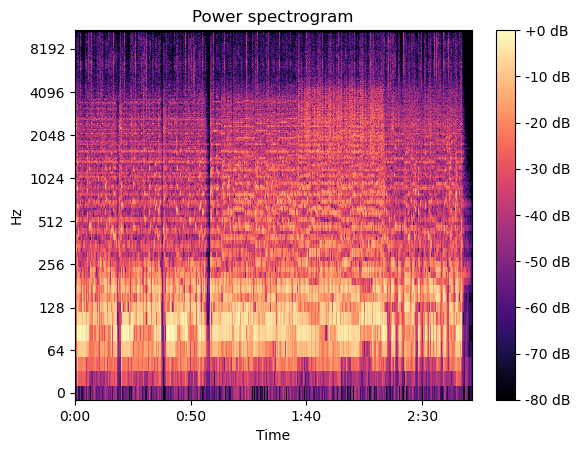

In [10]:
import matplotlib.pyplot as plt
def display_stft(stft):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='log', x_axis='time', ax=ax)
    ax.set_title('Power spectrogram')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
display_stft(stfts["AClassicEducation-NightOwl"]["mixture"])

In [11]:
def inverse_stft(stft):
    """
        takes a stft and inverses it into a time domain signal reconstructed from stft_matrix.
    """
    return librosa.istft(stft, n_fft=1024, hop_length=512)

In [15]:
inversed = (inverse_stft(stfts["AClassicEducation-NightOwl"]["mixture"]))

In [17]:
sd.play(inversed, samplerate=22050)